# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [9]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [11]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [76]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!


sfo_data.groupby('year').agg({'housing_units': ['mean']})








,housing_units
,mean
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [44]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

df.to_csv('housing_units_per_year.csv')

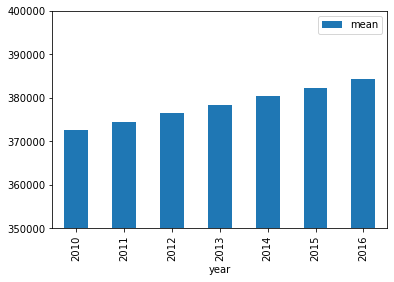

In [100]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

df = sfo_data.groupby('year').agg({'housing_units': ['mean']})

df.reset_index(level=0, inplace=True)

my_plot= df.plot(x ='year', y='housing_units', kind = 'bar', ylim=[350000,400000])


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [114]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!

sfo_data.groupby('year').aggregate({'sale_price_sqr_foot': 'mean',
                             'gross_rent': 'mean'})

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


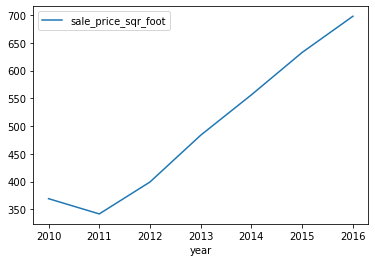

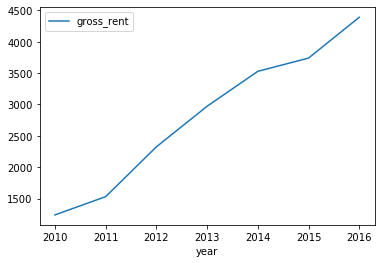

In [121]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
df = sfo_data.groupby('year').aggregate({'sale_price_sqr_foot': 'mean'})

df.reset_index(level=0, inplace=True)

my_plot1= df.plot(x ='year', y='sale_price_sqr_foot', kind = 'line')

# Line chart for average montly rent
df = sfo_data.groupby('year').aggregate({'gross_rent': 'mean'})

df.reset_index(level=0, inplace=True)

my_plot2= df.plot(x ='year', y='gross_rent', kind = 'line')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [122]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
sfo_data.groupby(['year', 'neighborhood']).agg({'mean'})


level_0 index sale_price_sqr_foot housing_units  \
                               mean  mean                mean          mean   
year neighborhood                                                             
2010 Alamo Square                 0     0          291.182945        372560   
     Anza Vista                   1     1          267.932583        372560   
     Bayview                      2     2          170.098665        372560   
     Buena Vista Park             3     3          347.394919        372560   
     Central Richmond             4     4          319.027623        372560   
...                             ...   ...                 ...           ...   
2016 Telegraph Hill             392   392          903.049771        384242   
     Twin Peaks                 393   393          970.085470        384242   
     Van Ness/ Civic Center     394   394          552.602567        384242   
     Visitacion Valley          395   395          328.319007        384242   
     Westwood Park              396   396          631.195426        384242   

                            gross_rent  
                                  mean  
year neighborhood                       
2010 Alamo Square                 1239  
     Anza Vista                   1239  
     Bayview                      1239  
     Buena Vista Park             1239  
     Central Richmond             1239  
...                                ...  
2016 Telegraph Hill               4390  
     Twin Peaks                   4390  
     Van Ness/ Civic Center       4390  
     Visitacion Valley            4390  
     Westwood Park                4390  

[397 rows x 5 columns]

In [139]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

df = sfo_data.groupby(['year', 'neighborhood']).agg({'mean'})

df.reset_index(level=0, inplace=True)

df.hvplot.line(x='year', y='sale_price_sqr_foot', width=2018
               groupby= 'neighborhood')

SyntaxError: invalid syntax (<ipython-input-139-77bffcb8fc20>, line 10)

In [140]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

df = sfo_data.groupby(['year', 'neighborhood']).agg({'mean'})

df.reset_index(level=0, inplace=True)

df.hvplot.line(x='year', y='gross_rent', width=2018
               groupby= 'neighborhood')

SyntaxError: invalid syntax (<ipython-input-140-248e45d512dc>, line 10)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [154]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

sfo_data.nlargest(10, 'sale_price_sqr_foot')


,level_0,index,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
346,346,346,2015,Union Square District,2258.702832,382295,3739
388,388,388,2016,Presidio Heights,1465.968586,384242,4390
374,374,374,2016,Merced Heights,1416.666667,384242,4390
226,226,226,2013,Union Square District,1290.472107,378401,2971
262,262,262,2014,Miraloma Park,1267.766203,380348,3528
386,386,386,2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
382,382,382,2016,Outer Richmond,1196.645437,384242,4390
323,323,323,2015,Marina,1132.837361,382295,3739
282,282,282,2014,South of Market,1119.838877,380348,3528
300,300,300,2015,Corona Heights,1100.791194,382295,3739


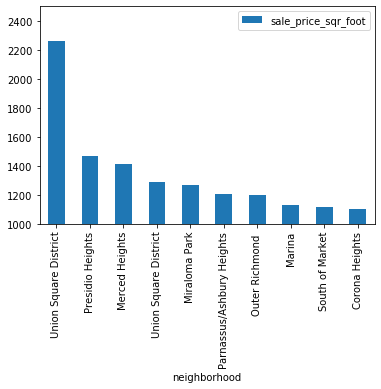

In [165]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

df = sfo_data.nlargest(10, 'sale_price_sqr_foot')


my_plot3= df.plot(x ='neighborhood', y='sale_price_sqr_foot', kind= 'bar', ylim=[1000,2500])


- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [166]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!

sfo_data.groupby(['year', 'neighborhood']).agg({'mean'})

level_0 index sale_price_sqr_foot housing_units  \
                               mean  mean                mean          mean   
year neighborhood                                                             
2010 Alamo Square                 0     0          291.182945        372560   
     Anza Vista                   1     1          267.932583        372560   
     Bayview                      2     2          170.098665        372560   
     Buena Vista Park             3     3          347.394919        372560   
     Central Richmond             4     4          319.027623        372560   
...                             ...   ...                 ...           ...   
2016 Telegraph Hill             392   392          903.049771        384242   
     Twin Peaks                 393   393          970.085470        384242   
     Van Ness/ Civic Center     394   394          552.602567        384242   
     Visitacion Valley          395   395          328.319007        384242   
     Westwood Park              396   396          631.195426        384242   

                            gross_rent  
                                  mean  
year neighborhood                       
2010 Alamo Square                 1239  
     Anza Vista                   1239  
     Bayview                      1239  
     Buena Vista Park             1239  
     Central Richmond             1239  
...                                ...  
2016 Telegraph Hill               4390  
     Twin Peaks                   4390  
     Van Ness/ Civic Center       4390  
     Visitacion Valley            4390  
     Westwood Park                4390  

[397 rows x 5 columns]

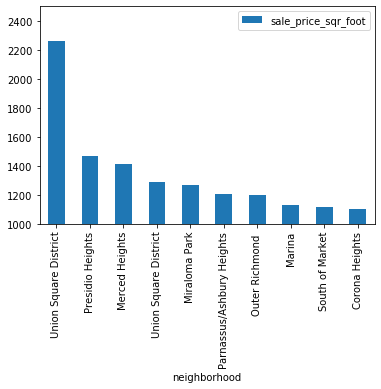

In [167]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE! 

my_plot3= df.plot(x ='neighborhood', y='sale_price_sqr_foot', kind= 'bar', ylim=[1000,2500])

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [170]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

file_path = Path("Data/neighborhoods_coordinates.csv")
neigh_data = pd.read_csv(file_path, index_col="Neighborhood")
neigh_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [173]:
# Calculate the mean values for each neighborhood
sfo_data.groupby('neighborhood').aggregate({'sale_price_sqr_foot': 'mean',
                             'housing_units': 'mean', 'gross_rent': 'mean'})

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [177]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

df1 = sfo_data.groupby('neighborhood').aggregate({'sale_price_sqr_foot': 'mean',
                             'housing_units': 'mean', 'gross_rent': 'mean'})

df2 = neigh_data

frames = [df1, df2]

pd.concat(frames)


,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
Alamo Square,366.020712,378401.0,2817.285714,NaN,NaN
Anza Vista,373.382198,379050.0,3031.833333,NaN,NaN
Bayview,204.588623,376454.0,2318.400000,NaN,NaN
Bayview Heights,590.792839,382295.0,3739.000000,NaN,NaN
Bernal Heights,576.746488,379374.5,3080.333333,NaN,NaN
...,...,...,...,...,...
West Portal,NaN,NaN,NaN,37.74026,-122.463880
Western Addition,NaN,NaN,NaN,37.79298,-122.435790
Westwood Highlands,NaN,NaN,NaN,37.73470,-122.456854
Westwood Park,NaN,NaN,NaN,37.73415,-122.457000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [ ]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [ ]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!